<a href="https://colab.research.google.com/github/ahrimhan/data_anonymization/blob/master/anonymization_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Anonymization for Privacy vs. Utility**


---


<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/ahrimhan/data_anonymization/blob/master/anonymization_titanic.ipynb) -->

## **Data anonymization**

Data anonymization is the process of protecting private or sensitive information by erasing or encrypting identifiers that connect an individual to stored data. For example, Personally Identifiable Information (PII) such as names, social security numbers, and addresses should be anonymized.

Personal data can be divided into sensitive and non-sensitive data, and the sensitive data has to be dealt carefully. The examples of sensitive data are as follows:
* Social security number (including truncated form)
* Place of birth
* Date of birth
* Mother's maiden name
* Biometric information
* Medical information (excluding brief references to absence from work)
* Personal financial information
* Credit card/purchase card account numbers
* Passport numbers
* Potentially sensitive employment information (e.g., performance ratings, discipinary actions, results of background investigations)
* Criminal history
* Information that may stigmatize or adversely affect an individual

Even when you clear data of identifiers, data may be reidentified by attackers. Through multiple sources (e.g., data available to the public), de-anonymization techniques can cross-reference the sources and reveal personal information. It is important to anonymize/encrypt data sufficiently for the preventive actions of later attacks. 

**Reidentification attack examples**

* Linkage attack on Netflix prize dataset for movie rating prediction
  * In 2008, papers were published the individual data could be identified with the iMDB (public data for movies available online)  
  http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.100.3581&rep=rep1&type=pdf

* Linkage attack on Governor medical record (Massachusetts Governor William Weld’s medical data)
  * Linked with voter records and the anonymized public medical data by removing names, addresses, and other fields that could identify people
  * Only 1 person with same zip code, gender, birthday

## **Goal**

In this project, I aim to do hands-on-experience on de-identifying sensitive data using various anonymization techniques and observe the effects of accuracy on machine learning models.



## **Titanic Data**

This is Kaggle competition data
to predict if a passenger survived the sinking of the Titanic or not.
You can download the here. [[Titanic data]](https://www.kaggle.com/c/titanic/data)

All used data and obtained results in this project can be downloaded here. [[Data download]](https://drive.google.com/drive/folders/1ufkU7MC-tMf4JP9uCMhTiJot8DpL1Wu6?usp=sharing)

I selected this data because it is simple but has sensitive data `(e.g., "Name", "PassengerId", ...)` so that I can practice on applying various anonymization techqnies and make predictive machine learning models.

The data has been split into two groups: training set (train.csv) and test set (test.csv). Each data is used for training machine learing models and testing the fitness of the models on unseen data, respectively. 

Here are simple explanation for data.

>Variable|	Definition|	Key
>--- | ---| ---
> PassengerId | Passenger ID |
>Survived| Survival |	0 = No, 1 = Yes
>Pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
>Sex	|Sex|	male, female
>Age|	Age in years	|
>Sibsp|	# of siblings / spouses aboard the Titanic	|
>Parch	|# of parents / children aboard the Titanic	|
>Ticket|	Ticket number	|
>Fare|	Passenger fare	|
>Cabin	|Cabin number	|
>Embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

* Pclass: A proxy for socio-economic status (SES)  
1st = Upper
2nd = Middle
3rd = Lower

* Age: Age is fractional if less than 1.   
If the age is estimated, it is in the form of xx.5

* Sibsp: The dataset defines family relations  
Sibling = brother, sister, stepbrother, and stepsister  
Spouse = husband and wife (mistresses and fiancés were ignored)

* Parch: The dataset defines family relations  
Parent = mother and father  
Child = daughter, son, stepdaughter, and stepson  
Some children traveled only with a nanny, therefore parch=0 for them.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# import import_ipynb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings('ignore')

Since Titanic data is publicized for the competition purpose, test data does not have "Survived" column, which is for the target variable for prediction and expected to be predicted and subimitted.
I aim to explore the accuracy of the machine learning models, so I need the "Survived" data. So, I will not use the test data but split and train using the train data only.

In [0]:
train_df = pd.read_csv('./drive/My Drive/data_anonymization/data/train.csv')

In [0]:
# url = ("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls")
# df = pd.read_excel(url)

There are 12 columns (attributes) with 891 rows (records).

In [0]:
train_df.shape

(891, 12)

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Types**

We can get insight overview of data as below. Among the 12 attributes, 7 are numerical types (type `float` and `int`) and 5 are object types (`object`). 

* `Pclass` is an ordinal feature. 
* `Sex` and `Embark` are categorical features.
* `Age`, `Fare`, `SibSp`, and `Parch` are numerical features.

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Missing Values**



There are missing values in columns of `Age`, `Cabin`, and `Embarked`. 

* Since `Cabin` has missed the large amounts of data (77.1 %), it may not be represent valuable insights and should be removed. This will be deleted in Suppression.
* There are only two missing values in `Embarked`, so we just delete two rows having missing values.
* 20% data is missing in `Age`. I do not want loose these data, so I decided to impute the age with the median age of each `Pclass`.

In [0]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 'Missing Rate %'])
missing_data.loc[missing_data['Total'] != 0]

,Total,Missing Rate %
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


Delete two rows having missing values in `Embarked`

In [0]:
train_df = train_df[train_df['Embarked'].notna()]

Impute the `Age` with the **median age** of each `Pclass`.  

: `Age` has high correlation with the `Pclass`.

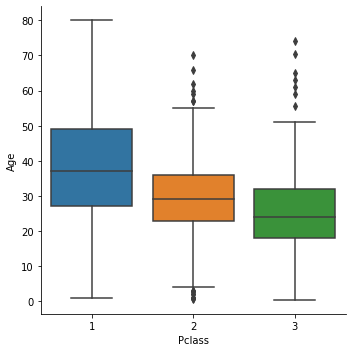

In [0]:
sns.catplot(data = train_df , x = 'Pclass' , y = 'Age', kind = 'box')
plt.show()

: Median age of each `Pclass`.

In [0]:
train_df[["Pclass", "Age"]].groupby(['Pclass'], as_index=False).median().sort_values(by='Age', ascending=False)

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


: Impute the `Age` with the **median age** of each `Pclass`.  

In [0]:
# a custom function for age imputation
def AgeImpute(df):
    Age = df[0]
    Pclass = df[1]
    
    if pd.isnull(Age):
        if Pclass == 1: return 37
        elif Pclass == 2: return 29
        elif Pclass == 3: return 24
        else: print("no class, error")
    else:
        return Age

# Age Impute
train_df['Age'] = train_df[['Age', 'Pclass']].apply(AgeImpute, axis = 1)

**Survival rate for each feature**

**Categorical Type**


`Sex = female`, `Pclass = 1`, and `Embarked = C` indicate the strong correlations with the survived rates.

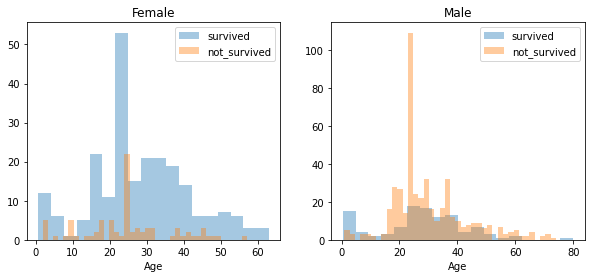

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [0]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.740385
1,male,0.188908


In [0]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


In [0]:
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**Continuous Type**

I could see that low `Fare` strongly correlates to died people.

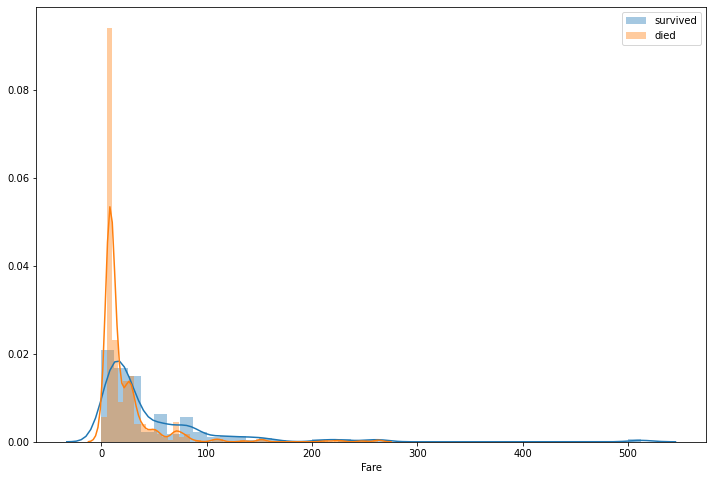

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
#mask = train_df.Survived == 1

# ax = sns.distplot(train_df[mask].Fare, label ='survived')
ax = sns.distplot(train_df.loc[train_df["Survived"] == 1]["Fare"], label ='survived')
ax = sns.distplot(train_df.loc[train_df["Survived"] == 0]["Fare"], label ='died')
ax.legend()

## **Trade-off: privacy vs. utility**

A **k-anonymized data** set has the property that each record is similar to at least another **k-1 other records** on the potentially identifying variables.

The more specific definition can be found here.
> El Emam, Khaled, and Fida Kamal Dankar. “Protecting privacy using k-anonymity.” Journal of the American Medical Informatics Association : JAMIA vol. 15,5 (2008): 627-37. [DOI](doi:10.1197/jamia.M2716)

Higher values of *k* imply a lower probability reidentification.  
But large *k* also means that data is more distorted, so there would be  greater information data loss, which results in low accuracy of prediction model and degrades the utility of data.  

In short, there are trade-off relationship between privacy and utility.
As the data gets harder to be reidentified (privacy level goes "up"), the data gets less useful (utility level goes "down").

Therefore, it is important to find the proper *k*.

I implemented anonymity measures of `k-anoanymity` and `l-diversity`, and `information loss`.

### Anonymity Measure (k-anonymity, l-diversity)


In [0]:
def get_k_anonymity(df, groupby):
  size_group = df.groupby(groupby).size()
  return min(size_group)

In [0]:
def get_l_diversity(df, groupby, sensitive):
  unique_num = df_ex.groupby(groupby, as_index=False)[sensitive].transform('nunique').iloc[0, 0]
  return unique_num

### Information Loss

I used the concept of the **information loss** [(from Cryptonumerics page)](https://docs.cryptonumerics.com/cn-protect-ds/?page=docs.cryptonumerics.com/cn-protect-ds-html/overview.html) and implemented as below.

Information loss is a measure of the average amount of information removed by making the data more general. This metric is used to minimize the amount of generalization applied to the data, while satisfying the privacy constraints.

As an example, suppose you have a dataset with age as a feature and entries: 23, 23, 43, 45, 34, 34, 58, 59. Now you want to apply k-anonymity with k=2, that is you want to have a minimum of 2 entries in each grouping. Age gets generalized to (20-30), (20-30), (40-50), (40-50), (30-40), (30-40), (50-60), (50-60) in order to satisfy the grouping of at least 2 entries in each group while attempting to minimize information loss. Information loss is calculated per entry as the new entry range divided by the range for the entire feature, (30-20)/(60-20) for the first entry. Then it is averaged over all entries, the resulting information loss would be 25%.

In [0]:
def getInformationLoss_interval(df, bins):
  b_max = bins.max()
  b_min = bins.min()
  range_val = b_max - b_min
  sum_val = 0
  
  for d in df: #d: pandas Interval
    if type(d) == pd.Interval:
      sum_val += (d.length / range_val)
    elif type(d) == int:
      sum_val += 0
    else:
      print("type error.")
    # print(re.search(r'\d+\.\d+', d).group())
    # sum_val += bin_dict[re.search(r'\d+\.\d+', d).group()]  
  
  return round(sum_val/(len(df))*100,2)

In [0]:
def getDict(bins):
  bin_dict = {}
  
  for prev, curr in zip(bins, bins[1:]):
    if prev not in bin_dict:
      bin_dict[prev] = round(curr - prev,2)

  return bin_dict

In [0]:
def getInformationLoss(df, col, bins):
  range_val = df[col].max() - df[col].min()
  sum_val = 0
  
  if range_val !=0:
    for prev, curr in zip(bins, bins[1:]):
      if curr > df[col].max():
        curr = df[col].max()
      if prev < df[col].min():
        prev = df[col].min()
      sum_val += (curr - prev)/range_val
    sum_val = sum_val / (len(bins) - 1) #average
  return round(sum_val*100, 2) #decimal 2 point

## Anonymization Techniques

### Suppression

**Description**  
Suppression refers to removal of data. The types of suppression are as follows.

1. **Attribute suppression**: **column deletion** in a dataset (in databases and spreadsheets).
2. **Record suppression**: **row deletion**. 
3. **Masking**: **partial deletion** (i.e., applied only to some characters in attributes); Character masking is the change of the characters of a data value, e.g., by using a constant symbol (e.g., “*” or “x”). 

**When to use**  
Attribute suppression:    
When an attribute is not required in the anonymised dataset, or when the attribute cannot otherwise be suitably anonymised with another technique.

Record suppression:  
To remove **outlier** records which are unique or do not meet other criteria such as k-anonymity, and not to keep in the anonymised dataset. Outliers can lead to easy re-identification. 

Masking:  
When the data value is a string of characters and hiding part of it is sufficient to certain degree of anonymity required. Masking gives the benefit for retaining data as possible.

**How to use**   
Attribute suppression:   
Delete (e.g. remove) the attribute(s), or if the structure of the dataset
needs to be maintained, clear the data (and possibly the header). Note that the
suppression should be actual removal (i.e., permanent), and not just ”hiding the
column” . Similarly, ‘redacting’ may not be sufficient if the underlying data remains somewhat accessible.

Record suppression:  
Delete the entire record. Note that the suppression should be permanent, and not just a ‘”hide row”6 function; similarly, ‘redacting’ may not be sufficient if the underlying data remains accessible.

Masking:  
Depending on the nature of attribute, replace the appropriate characters with a chosen symbol. Depending on the attribute type, you may decide to replace a fixed number of characters (e.g., for credit card numbers), or a variable number of characters (e.g., for email address).

**In Titanic Data**

#### Delete columns: "PassengerId", "Ticket" and "Cabin"

* "PassengerId" is personal data, and it has unique values for every row. I delete this attribute.
* "Ticket" does not seem to give useful insight for predicting the survival. "Ticket" is not directly related to personal data, but it has unique 681 records (out of 891 records). In this case, when joined/combined with other public and multiple resources, it is risky to reveal personal information. I decide to delete "Ticket" attribute.
* I could find that the cabins starting with `C` and `B` have most number of survivals. But, in the cabin of `C`, there was also significant number of dying people. In the perspective of the survival ratio, the cabins of `D` and `E` have the highest rates.  
"Cabin" has too many missing values (data existing 204 out of 891 records), so we delete this attribute.

<!-- Removing outliers -->


In [0]:
df_cabin = train_df.loc[train_df["Cabin"].notnull()].copy()
df_cabin['Deck'] = [x[:1] for x in df_cabin['Cabin']]

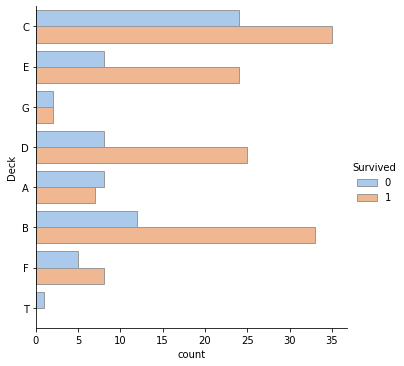

In [0]:
sns.catplot(y="Deck", hue="Survived", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_cabin)


In [0]:
df_cabin[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Deck,Survived
3,D,0.757576
4,E,0.750000
1,B,0.733333
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,T,0.000000


Delete Columns ["PassengerId", "Ticket", "Cabin"]

In [0]:
train_df.drop(columns = ["PassengerId", "Ticket", "Cabin"], inplace=True) #the inplace parameter will change the dataframe without assignment

### Generalization: Bucketing

**Description**  
A deliberate reduction in the precision of data. 

1. Generalize the range of values:
  - Example: Test scores
    - 0-25: Low, 26-75: Medium, 76-100: High
2. Generalize the strings or enumerated values:  
  - Example: Job titles   
    - "university dean", "assistant/associate professor" to "educator"
    - "senior/junior/distiguished engineer" to "engineer"


**When to use**  
It is used for values that can be generalised and still be useful for the intended purpose.

**How to use**  
Design appropriate data categories and rules for translating data.

**In Titanic Data**

1. Generalize the range of values: "Age"
2. Generalize the strings or enumerated values: "Name"
3. Derive the new feature and generalize the range of values: "Familysize" = "SibSp" + "Parch"

**Observations on Age**

I provide age distribution and histogram on the counts of survived or not according to passengers' ages.

* Infants (Age <=3) had high survival rate.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

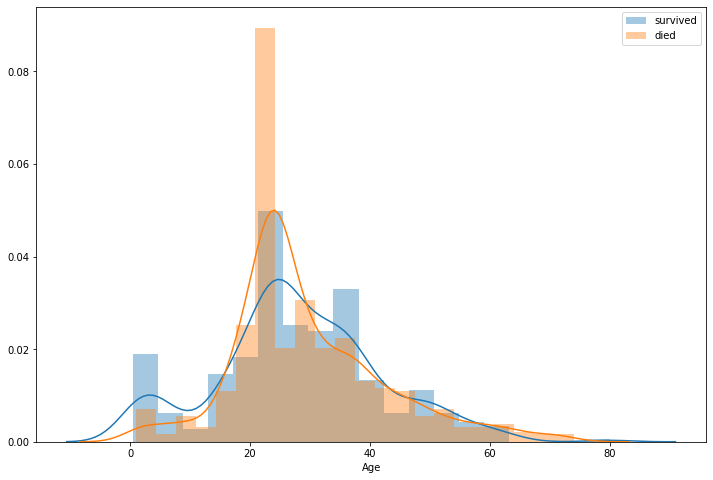

In [0]:
###
# #plots a bar graph of the age distribution
# plt.figure(figsize=(8,4))
# train_df["Age"].plot(kind='kde', alpha=0.6, title='Age distribution', xlim=(-20, 80))
# plt.tight_layout()
# plt.show()
###

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.distplot(train_df.loc[train_df["Survived"] == 1]["Age"], label ='survived')
ax = sns.distplot(train_df.loc[train_df["Survived"] == 0]["Age"], label ='died')
ax.legend()

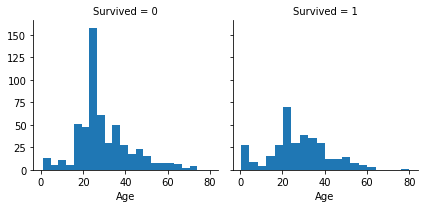

In [0]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### Generalize the range of values: "Age" 

In [0]:
# def getPrivacyAndInfoLoss(df, col, label, bins):
#   k_anony_list = []
#   label_list = []
#   data_loss_list = []

#   for c, l, b in zip(col, label, bins):
#     k_anony_list.append(get_k_anonymity(df, [c]))
#     label_list.append(l)
#     data_loss_list.append(getInformationLoss_interval(df[c], b))

#   result = pd.DataFrame(list(zip(label_list, k_anony_list, data_loss_list)), columns=['anonymization', 'k-anonymity', "data_loss %"])
#   return result

def getPrivacyAndInfoLoss(df, col, label, bins):
  k_anony_list = []
  data_loss_list = []

  for c, b in zip(col, bins):
    k_anony_list.append(get_k_anonymity(df, [c]))
    data_loss_list.append(getInformationLoss_interval(df[c], b))

  result = pd.DataFrame(list(zip(label, k_anony_list, data_loss_list)), columns=['anonymization', 'k-anonymity', "data_loss %"])
  return result

In [0]:
def drawPrivacyAndInfoLoss(result, col):
  plt.plot(result["k-anonymity"], result["data_loss %"])
  plt.ylabel("data_loss %")
  plt.xlabel("k-anonymity")
  plt.title(col + " Anonymization")
  plt.show()

**Auto Bucketing: Giving By Total Bin Number**

The "Age" columns have been generalized according to the various total number of bins (bins = 5, 10, 15, 20). 

In [0]:
# bins nums
train_df['Age_bin5'], res_bin5 = pd.cut(train_df['Age'], bins=5, right=True, retbins=True)
train_df['Age_bin10'], res_bin10 = pd.cut(train_df['Age'], bins=10, right=True, retbins=True)
train_df['Age_bin15'], res_bin15 = pd.cut(train_df['Age'], bins=15, right=True, retbins=True)
train_df['Age_bin20'], res_bin20 = pd.cut(train_df['Age'], bins=20, right=True, retbins=True)

In [0]:
cols = ['Age_bin5', 'Age_bin10', 'Age_bin15', 'Age_bin20']
labels = ['Age_bin5', 'Age_bin10', 'Age_bin15', 'Age_bin20']
bins = [res_bin5, res_bin10, res_bin15, res_bin20]
age_result = getPrivacyAndInfoLoss(train_df, cols, labels, bins)
age_result.sort_values(by='data_loss %', ascending=True)

,anonymization,k-anonymity,data_loss %
3,Age_bin20,1,5.00
2,Age_bin15,1,6.67
1,Age_bin10,2,10.00
0,Age_bin5,11,19.99


Text(0.5, 1.0, 'Age Anonymization')

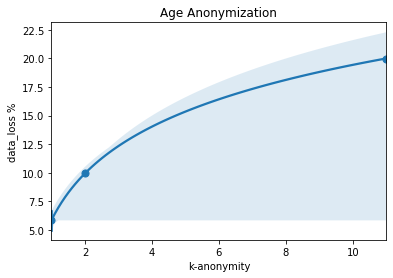

In [0]:
#drawPrivacyAndInfoLoss(result, "Age")
ax = sns.regplot(x="k-anonymity", y="data_loss %", data=age_result,
                 x_estimator=np.mean, logx=True)
ax.set_title("Age Anonymization")

**Auto Bucketing Anonymization Results**:

Please not that the small number of total number of bins indicates that each bin size gets bigger and more coarse grained data is retained. 
On the other hand, as the total number of bins increases, each bin size gets smaller and more fine grained data is retained.

I could observe the as the **total number of bins decreases (each bin gets larger and more coarse)**, the percent of data loss increases (in other hand, **accuracy decreases**) while the k-anonymity measure increases as there are more same records (**privacy increases**). 

When the total number of bins is 5, we get the k-anonymity of 11 and the data loss of 19.99%, which seems reasonable level of the anonymization.

The range of (0.34, 16.336] when the number of bins 5 represents the 0.55 survived rate.

In [0]:
train_df[["Age_bin5", "Survived"]].groupby(['Age_bin5'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_bin5,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.426471
2,"(32.252, 48.168]",0.410138
1,"(16.336, 32.252]",0.336714
4,"(64.084, 80.0]",0.090909


The range of (76.021, 80.0] when the number of bins 20 represents the 1 survaval rate. However, in this case, **the k-anonymity is 1, so this anonymization must not be used.**
This means that there is only one person whose age is range from 76.021 to 80.0. The age in this range reveals personal identity which compromises privacy.

In [0]:
train_df[["Age_bin20", "Survived"]].groupby(['Age_bin20'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_bin20,Survived
19,"(76.021, 80.0]",1.000000
0,"(0.34, 4.399]",0.675000
1,"(4.399, 8.378]",0.642857
3,"(12.357, 16.336]",0.483871
12,"(48.168, 52.147]",0.482759
8,"(32.252, 36.231]",0.479452
13,"(52.147, 56.126]",0.437500
7,"(28.273, 32.252]",0.410526
9,"(36.231, 40.21]",0.405405
14,"(56.126, 60.105]",0.384615


**Manual Bucketing**

By referring the age distribution, I categorize the age groups manually (number of bins = 1, 5, and 8).

To see the extreme case, I made the one bin, and it apparently shows that k-anonymity of 889 (i.e., an age has 889 records which are the entire records of a dataset) and the loss of data is 100%.

When the number of bins is 5, we set the specific age ranges into age groups. We made two groups where only infant age ranges are different:
* Infant: 0\~4 (`Age_man_bin5`) | 0\~1 (`Age_man_bin5_v2`)
* Kid_Teen: 5\~20
* Young Adult: 21\~34
* Middle-Aged Adult: 35\~55
* Senior: 56\~80.  
It is good to substitute the range of age into the age category because we can hide the specific and anonymize age.

To see the effect of the more fine grained level of age group, we also use the number of bins of 8.


In [0]:
## manual bins
# extreme case
bins_man_bin1= [-1, 80]
labels_man_bin1 = ['One']

bins_man_bin5= [-1, 4, 20, 34, 55, 80]
labels_man_bin5 = ['Infant', 'Kid_Teen', 'Young_Adult', 'Middle_Aged_Adult', 'Senior']

bins_man_bin5_v2= [-1, 1, 20, 34, 55, 80]

bins_man_bin8= [-1, 1, 12, 20, 30, 40, 50, 60, 80]
labels_man_bin8 = ['0-1', '2-12', '13-20', '21-30', '31-40', '41-50', '51-60', '60>']

train_df['Age_man_bin1'], res_man_bin1 = pd.cut(train_df['Age'], bins=bins_man_bin1, right=True, retbins=True) #right = True: default
train_df['Age_man_bin1_cat'] = pd.cut(train_df['Age'], bins=bins_man_bin1, labels=labels_man_bin1, right=True) 

train_df['Age_man_bin5'], res_man_bin5 = pd.cut(train_df['Age'], bins=bins_man_bin5, right=True, retbins=True) 
train_df['Age_man_bin5_cat'] = pd.cut(train_df['Age'], bins=bins_man_bin5, labels=labels_man_bin5, right=True) 

train_df['Age_man_bin5_v2'], res_man_bin5_v2 = pd.cut(train_df['Age'], bins=bins_man_bin5_v2, right=True, retbins=True) 
train_df['Age_man_bin5_v2_cat'] = pd.cut(train_df['Age'], bins=bins_man_bin5_v2, labels=labels_man_bin5, right=True) 

train_df['Age_man_bin8'], res_man_bin8 = pd.cut(train_df['Age'], bins=bins_man_bin8, right=True, retbins=True) 
train_df['Age_man_bin8_cat'] = pd.cut(train_df['Age'], bins=bins_man_bin8, labels=labels_man_bin8, right=True) 

In [0]:
cols = ['Age_man_bin1', 'Age_man_bin5', 'Age_man_bin5_v2', 'Age_man_bin8']
labels = ["Age_man_bin1", "Age_man_bin5", 'Age_man_bin5_v2', "Age_man_bin8"]
bins = [res_man_bin1, res_man_bin5,res_man_bin5_v2, res_man_bin8]
age_man_result = getPrivacyAndInfoLoss(train_df, cols, labels, bins)
age_man_result["category"] = [labels_man_bin1, labels_man_bin5, labels_man_bin5, labels_man_bin8]
age_man_result["bin range (,]"] = [res_man_bin1, res_man_bin5, res_man_bin5_v2, res_man_bin8]
age_man_result

,anonymization,k-anonymity,data_loss %,category,"bin range (,]"
0,Age_man_bin1,889,100.00,[One],"[-1, 80]"
1,Age_man_bin5,39,19.95,"[Infant, Kid_Teen, Young_Adult, Middel_Aged_Ad...","[-1, 4, 20, 34, 55, 80]"
2,Age_man_bin5_v2,14,20.98,"[Infant, Kid_Teen, Young_Adult, Middel_Aged_Ad...","[-1, 1, 20, 34, 55, 80]"
3,Age_man_bin8,14,12.25,"[0-1, 2-12, 13-20, 21-30, 31-40, 41-50, 51-60,...","[-1, 1, 12, 20, 30, 40, 50, 60, 80]"


Text(0.5, 1.0, 'Age Anonymization')

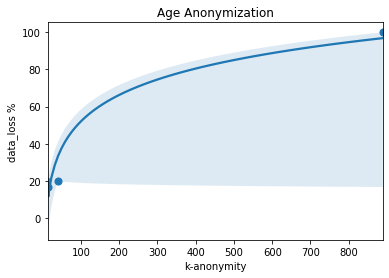

In [0]:
ax = sns.regplot(x="k-anonymity", y="data_loss %", data=age_man_result,
                 x_estimator=np.mean, logx=True)
ax.set_title("Age Anonymization")

**Manual Bucketing Anonymization Result**:

* `Age_man_bin5` and `Age_bin5`:  
When compared to the auto bucketing of the number of 5 (`Age_bin5`), which has the k-anonymity of 11 and data loss of 19.99%, the manual bucketing of the number of 5 (`Age_man_bin5`) has larger k-anonymity of 39 and more less data loss of 19.95%. **This manual bucketing indicates stronger privacy and higher (or similar level of) utility of data.** 

* `Age_man_bin5` and `Age_man_bin5_v2`:  
When adjusting the first bucket of age (i.e., infant: (-1, 4] (`Age_man_bin5`) --> (-1, 1] (`Age_man_bin5_v2`)),
the age group of (-1, 1] becomes the significant feature by relating to the high survived rate (0.857143). This attribute can be an important indicator when building prediction model for survivals. However, the k-anonymity is decreased to 14, and data loss slightly increased to 20.98%.

* `Age_man_bin5` and  `Age_man_bin8`:  
When using the `Age_man_bin8` bins, the data loss decreased to 12.25% and the k-anonymity is 14, while retaining the infant age range (-1, 1] indicating the high survived rate (0.857143). 

* **Conclusion**:  
The anonymization level has to be controlled by the privacy policy/goal/situation.
  * If we need sufficient high number of k-anonymity, we need to sacrifice data loss.
  * If we need minimum loss of data, we may get low number of k-anonymity.  

  Let's say we will anonymize data as following condition: k-anonymity > 10 and data_loss < 20%. The satisfying anonymizations are `Age_man_bin5` and `Age_man_bin8`. Since the infant (age 0~1) has high correlation with the `Survived` in `Age_man_bin8`, we choose this attribute as the representative of the "Age". 


In [0]:
train_df[["Age_man_bin5", "Survived"]].groupby(['Age_man_bin5'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_man_bin5,Survived
0,"(-1, 4]",0.675000
3,"(34, 55]",0.422222
1,"(4, 20]",0.395683
2,"(20, 34]",0.340807
4,"(55, 80]",0.282051


Infant age range (-1, 1] represents the high survived rate (0.857143).

In [0]:
train_df[["Age_man_bin5_v2", "Survived"]].groupby(['Age_man_bin5_v2'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_man_bin5_v2,Survived
0,"(-1, 1]",0.857143
1,"(1, 20]",0.424242
3,"(34, 55]",0.422222
2,"(20, 34]",0.340807
4,"(55, 80]",0.282051


In [0]:
train_df[["Age_man_bin8", "Survived"]].groupby(['Age_man_bin8'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age_man_bin8,Survived
0,"(-1, 1]",0.857143
1,"(1, 12]",0.509091
4,"(30, 40]",0.445652
6,"(50, 60]",0.404762
5,"(40, 50]",0.383721
2,"(12, 20]",0.381818
3,"(20, 30]",0.323607
7,"(60, 80]",0.190476


Both "Age_man_bin8" and "Age_man_bin8_cat" are the results of same binning technique. 

"Age_man_bin8" represents bucket ranges and "Age_man_bin8_cat" shows specific category names (e.g., (-1, 1]: range, "Infant": category name). 

I only remain "Age_man_bin8_cat" and substitue it with "Age" column. 
I drop all age related columns. 

In [0]:
train_df.drop(columns=["Age_man_bin1", "Age_man_bin1_cat", "Age_man_bin5_v2", "Age_man_bin5_v2_cat", "Age_man_bin5", "Age_man_bin8", "Age_bin5", "Age_bin10", "Age_bin15", "Age_bin20"], inplace=True)
train_df.rename(columns = {"Age_man_bin5_cat":"Age_man_bin5", "Age_man_bin8_cat": "Age_man_bin8"}, inplace=True)

#### Generalize the range of values: "Fare" 

In [0]:
train_df['Fare'] = train_df['Fare'].apply(np.int64)

In [0]:
fare_labels=['Cheap', 'Moderate', 'Expensive']
fare_bins = [-1, 30, 200, 512]

train_df['Fare_bin3'], res_fare_bin5 = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels, right=True, retbins=True)

In [0]:
train_df[["Fare_bin3", "Survived"]].groupby(['Fare_bin3'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_bin3,Survived
2,Expensive,0.700000
1,Moderate,0.566502
0,Cheap,0.316817


#### Generalize the range of values: "Familysize" = "SibSp" + "Parch" 

Since "SibSp" and "Parch" do not represent the different correlations on survival rate, we reduce the two features and derive the new feature "FamilySize".

In [0]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [0]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [0]:
train_df['FamilySize'] = train_df["SibSp"] + train_df["Parch"] + 1 #family size including me

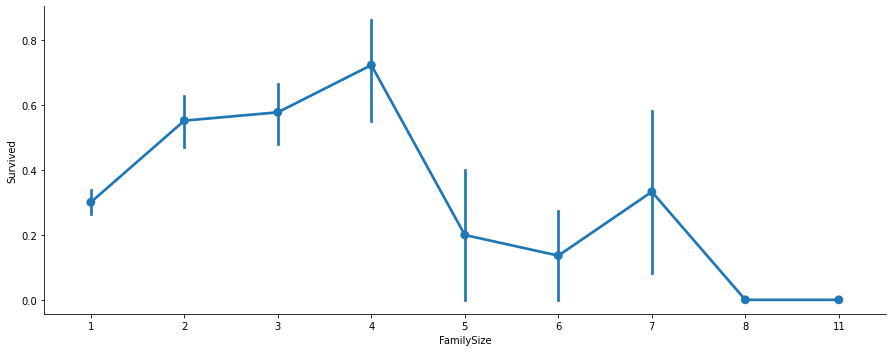

In [0]:
# axes = sns.factorplot('relatives','Survived', 
#                       data=train_df, aspect = 2.5, )
axes = sns.factorplot(x='FamilySize', y='Survived', 
                      data=train_df, aspect = 2.5)

In [0]:
train_df[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


I anonymize the ``FamilySize`` into 3 levels of categories: 'Alone' (``FamilySize`` = 1), 'Small' (``FamilySize`` = 2\~4), and 'Large' (``FamilySize`` = 5\~11).

In [0]:
fam_bin11 = list(range(12))

In [0]:
familysize_labels = ['Alone','Small','Large']
familysize_bins = [0,1,4,11]

In [0]:
train_df['FamilySize_bin3'], res_fam_bin3 = pd.cut(train_df['FamilySize'], bins=familysize_bins, retbins=True, right=True)
train_df['FamilySize_bin3_cat'] = pd.cut(train_df['FamilySize'], bins=familysize_bins, labels=familysize_labels, right=True)

In [0]:
train_df['FamilySize_bin11'], res_fam_bin11 = pd.cut(train_df['FamilySize'], bins=fam_bin11, retbins=True, right=True)

In [0]:
train_df[["FamilySize_bin3_cat", "Survived"]].groupby(['FamilySize_bin3_cat'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize_bin3_cat,Survived
1,Small,0.578767
0,Alone,0.300935
2,Large,0.161290


**Anonymization Result**

By anonymizing the "FamilySize" into 3 categories, \["Alone", "Small", "Large"\], the k-anonymity increased to 62 while data loss becomes 18.87%. 
This data loss is acceptable while increasing privacy. 

In [0]:
cols = ['FamilySize', 'FamilySize_bin3']
labels = ["FamilySize: No Anonymization", "FamilySize_bin: [Alone, Small, Large]"]
bins = [res_fam_bin11, res_fam_bin3]
family_result = getPrivacyAndInfoLoss(train_df, cols, labels, bins)
family_result["category"] = ["Numeric", familysize_labels]
family_result["bin range (,]"] = [res_fam_bin11, res_fam_bin3]
family_result

,anonymization,k-anonymity,data_loss %,category,"bin range (,]"
0,FamilySize: No Anonymization,6,0.00,Numeric,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
1,"FamilySize_bin: [Alone, Small, Large]",62,18.87,"[Alone, Small, Large]","[0, 1, 4, 11]"


In [0]:
train_df.drop(columns=["SibSp", "Parch", "FamilySize_bin3", "FamilySize_bin11"], inplace=True)
train_df.rename(columns = {"FamilySize_bin3_cat":"FamilySize_bin"}, inplace=True)

#### Generalize the strings or enumerated values: delete "Name" and new column "Title"



In [0]:
for col, df in train_df.items():
  train_df['Title'] = train_df['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1))

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The title "Master" comes with only male names, but represents high possibility of "Survived". This record may have significant indicator for predicting the survived.

In [0]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#  	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Title,Survived
3,Mrs,0.792000
1,Miss,0.701087
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


**Anonymization Result**

In [0]:
print("k-anonymity of the attribute \"Title\":", get_k_anonymity(train_df, ['Title']))
print("k-anonymity of the attribute \"Name\":", get_k_anonymity(train_df, ['Name']))

k-anonymity of the attribute "Title": 23
k-anonymity of the attribute "Name": 1


In [0]:
train_df.drop(columns = ["Name"], inplace=True)

### Synthetic Data

**Description**

This synthesizing technique is slightly different as other anonymization techniques, as it is mainly used to generate synthetic datasets directly and separately from the original data, instead of modifying the original dataset.

**When to use** 

Typically, when a large amount of data is required for system testing, but the actual data cannot be used and yet the data should be “realistic” in certain aspects, like format, relationship among attributes, etc.

**How to use**

Find the patterns from the original dataset (i.e. the actual data) and apply the patterns when creating the “anonymised” dataset (i.e. the synthetic data). The degree to which the patterns from the original dataset need to be replicated depends on the how the anonymised dataset is to be used.

**In Titanic Data**

I produced the data according to the distribution of original data.
I will investigate how the generated data will affect the accuracy in prediction models.

I referenced the following article:
https://dev.to/r0f1/a-simple-way-to-anonymize-data-with-python-and-pandas-79g

The 'Pclass' is not the numeric data, but ordered category data. We convert the data type here.

In [0]:
train_df['Pclass'] = train_df["Pclass"].astype("category").cat.as_ordered()

In [0]:
#Survivied: target variable
#train_df['Survived'] = train_df["Survived"].astype("category") 

In [0]:
categorical_feature = train_df.select_dtypes(include=['category', 'object']).columns
print("categorical feature(s):", categorical_feature)

categorical feature(s): Index(['Pclass', 'Sex', 'Embarked', 'Age_man_bin5', 'Age_man_bin8',
       'Fare_bin3', 'FamilySize_bin', 'Title'],
      dtype='object')


In [0]:
# train_df['Survived'] = train_df["Survived"].astype("category")

In [0]:
continuous_feature = train_df.select_dtypes(include=['int', 'float']).columns
print("continuous feature(s):", continuous_feature)

continuous feature(s): Index(['Survived', 'Age', 'Fare', 'FamilySize'], dtype='object')


**Categorical attributes**

I generated the data of categorical types for size of 1000.

In [0]:
dict_cat = {}

cat_cols = categorical_feature.to_list()
cat_cols.append("Survived")

for c in cat_cols:
  counts = train_df[c].value_counts() #return type: Series
  dict_cat[c] = np.random.choice(list(counts.index), p=(counts/len(train_df)).values, size=1000) #generate records of size

In [0]:
from collections import Counter

for k,v in dict_cat.items():
  print(Counter(v))

Counter({3: 546, 1: 239, 2: 215})
Counter({'male': 648, 'female': 352})
Counter({'S': 719, 'C': 197, 'Q': 84})
Counter({'Young_Adult': 475, 'Middel_Aged_Adult': 265, 'Kid_Teen': 170, 'Senior': 47, 'Infant': 43})
Counter({'21-30': 411, '31-40': 217, '13-20': 125, '41-50': 97, '2-12': 62, '51-60': 42, '60>': 35, '0-1': 11})
Counter({'Cheap': 744, 'Moderate': 235, 'Expensive': 21})
Counter({'Alone': 601, 'Small': 336, 'Large': 63})
Counter({'Mr': 613, 'Miss': 201, 'Mrs': 125, 'Master': 35, 'Rare': 26})
Counter({0: 614, 1: 386})


In [0]:
df_generate = pd.DataFrame.from_dict(dict_cat)

### Pseudonymization
> Data is transformed into other forms but is retained and can be reversed for later use

**Description**  
Pseudonymization is a data management and de-identification procedure by which personally identifiable information fields within a data record are replaced by one or more artificial identifiers, or pseudonyms. A single pseudonym for each replaced field or collection of replaced fields makes the data record less identifiable while **remaining suitable for data analysis and data processing**.
Pseudonymization (or pseudonymisation) can be one way to comply with the European Union's new General Data Protection Regulation demands for **secure data storage of personal information.** 

* **Pseudonymization vs. Anonymization**  
Pseudonymized data can be restored to its original state with the addition of information which then allows individuals to be re-identified, while anonymized data can never be restored to its original state.

**When to use**
When data values need to be uniquely distinguished and where no character or any other implied information of the original attribute shall be kept.

**How to use**  
Replace the respective attribute values with made up values. One way to do this is to pre-generate a list of made up values, and randomly select from this list to replace each of the original values. The made up values should be unique, and should have no relationship to the original values (such that one can derive the original values from the pseudonyms).
* Techniques
  * Format preserving encryption
  * Tokenization

**In Titanic Data**



#### Label Categorical Attributes and Retain the Lookup Table

I transformed the categorical values in "Sex" and "Embarked" into other forms of numeric values for building machine learning models for prediction.
The sensitive data can be replaced to artificial numbers and
these linked information can be stored as lookup tables. 
The lookup tables should be stored safely by encrypted or in another storage in practice.

I used two layers of the lookup tables: random number and encoding from 0 to n.
* The first lookup table links each category value to randomly generated number  
* The second lookup table links these random numbers to 0 to n.

The random number makes adversary hard to attack the data because pseudonyms and tokens are hard to be identified. In addition, two layered lookup tables keep data even more secure. When data is used for machine learning models for prediction, it should be encoded into 0 to n; because, 
in the categorical attribute, it should not contain numerical relations.
It might be a good idea if label encoding is substituted by the [one hot encoder](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/). 


In [0]:
def pseudonymize_df_cat(df, cols, rand=True):
  lookup_tb = []
  for col_name in cols:
    if rand == True:
      keys = {cats: np.random.randint(low=100000, high=999999) for cats in df[col_name].unique()}
    else: 
      #dict: keys[cats] = i
      keys = {cats: i for i, cats in enumerate(df[col_name].unique())}

    lookup_tb.append((col_name, keys))
    df[col_name] = df[col_name].apply(lambda x:  keys[x])
  return df, lookup_tb

In [0]:
df_copy = train_df.copy()
df_1st, keys_1st = pseudonymize_df_cat(df_copy, categorical_feature, True)
for s in keys_1st:
  print(s)
df_1st.head(5)

('Pclass', {3: 963986, 1: 523769, 2: 729345})
('Sex', {'male': 213174, 'female': 320197})
('Embarked', {'S': 821990, 'C': 246547, 'Q': 138665})
('Age_man_bin5', {'Young_Adult': 871508, 'Middel_Aged_Adult': 482756, 'Infant': 896676, 'Kid_Teen': 871822, 'Senior': 653232})
('Age_man_bin8', {'21-30': 124394, '31-40': 217175, '51-60': 582705, '2-12': 303221, '13-20': 317510, '60>': 306912, '41-50': 972212, '0-1': 480826})
('Fare_bin3', {'Cheap': 274504, 'Moderate': 268256, 'Expensive': 852783})
('FamilySize_bin', {'Small': 546125, 'Alone': 937393, 'Large': 948383})
('Title', {'Mr': 963429, 'Mrs': 650785, 'Miss': 735014, 'Master': 649730, 'Rare': 187002})


,Survived,Pclass,Sex,Age,Fare,Embarked,Age_man_bin5,Age_man_bin8,Fare_bin3,FamilySize,FamilySize_bin,Title
0,0,963986,213174,22.0,7,821990,871508,124394,274504,2,546125,963429
1,1,523769,320197,38.0,71,246547,482756,217175,268256,2,546125,650785
2,1,963986,320197,26.0,7,821990,871508,124394,274504,1,937393,735014
3,1,523769,320197,35.0,53,821990,482756,217175,268256,2,546125,650785
4,0,963986,213174,35.0,8,821990,482756,217175,274504,1,937393,963429


In [0]:
df_2nd, keys_2nd = pseudonymize_df_cat(df_1st, categorical_feature, False)
for s in keys_2nd:
  print(s)
df_2nd.head(5)

('Pclass', {963986: 0, 523769: 1, 729345: 2})
('Sex', {213174: 0, 320197: 1})
('Embarked', {821990: 0, 246547: 1, 138665: 2})
('Age_man_bin5', {871508: 0, 482756: 1, 896676: 2, 871822: 3, 653232: 4})
('Age_man_bin8', {124394: 0, 217175: 1, 582705: 2, 303221: 3, 317510: 4, 306912: 5, 972212: 6, 480826: 7})
('Fare_bin3', {274504: 0, 268256: 1, 852783: 2})
('FamilySize_bin', {546125: 0, 937393: 1, 948383: 2})
('Title', {963429: 0, 650785: 1, 735014: 2, 649730: 3, 187002: 4})


,Survived,Pclass,Sex,Age,Fare,Embarked,Age_man_bin5,Age_man_bin8,Fare_bin3,FamilySize,FamilySize_bin,Title
0,0,0,0,22.0,7,0,0,0,0,2,0,0
1,1,1,1,38.0,71,1,1,1,1,2,0,1
2,1,0,1,26.0,7,0,0,0,0,1,1,2
3,1,1,1,35.0,53,0,1,1,1,2,0,1
4,0,0,0,35.0,8,0,1,1,0,1,1,0


In [0]:
#train_df = df_2nd

In [0]:
train_df.to_csv("./drive/My Drive/data_anonymization/data/anony_org_titanic.csv", sep='\t', encoding='utf-8')

In [0]:
df_2nd.to_csv("./drive/My Drive/data_anonymization/data/anony_encod_titanic.csv", sep='\t', encoding='utf-8')

In [0]:
df_generate.to_csv("./drive/My Drive/data_anonymization/data/anony_gen_titanic.csv", sep='\t', encoding='utf-8')

### Swapping

**Description**

Swapping involves exchanging QI values between records. The purpose of swapping is to rearrange data in the dataset such that the individual attribute values are still represented in the dataset, but generally, do not correspond to the original records. This technique is also referred to as **shuffling** and **permutation**.

**When to use**

When subsequent analysis only needs to look at **aggregated data**, or analysis is at the intra-attribute level; in other words, there is no need for analysis of relationships between attributes at the record level.

Please note that if the purpose of the anonymised dataset is to study the relationships between attributes, swapping is not appropriate. Other methods of anonymisation may be more suitable such as a generalization technique.

**How to use**

* First, identify which attributes to swap. 
* Then, for each, swap or reassign the attribute values to any record in the dataset.

**In Titanic Data**

I aim to provide the anonymized data for the survival prediction using machine learning techniques. We do not use the Titanic data for aggregation purpose, therefore, each record is important for prediction. In this project, I do not attempt to use the swapping method.

### Perturbation

**Description**

The values from the original dataset are modified to be slightly different.
Perturbation involvwa **randomization** by replacing specific quasi-identifier (QI) values with equally specific but different values. 

**When to use**

For quasi-identifiers (typically numbers and dates) which may potentially be identifying when combined with other data sources, and slight changes in value are acceptable. 
**The perturbation technique should not be used where data accuracy is crucial.**

One advantage of perturbation is that it **significantly decreases the probability of finding a unique match** in a matchable file. If the adversary knows which QI fields have been disturbed, then the adversary must work with only the unperturbed fields, which greatly reduces the chance of finding a unique match. If the adversary does not know which fields have been perturbed, then he or she is unable to use a matching algorithm. 

Another advantage of perturbation is that it **maintains statistical properties about the original data, such as mean or variance**. For many applications, the result is that utility is not significantly lessened. 

**How to use**

It depends on the exact data perturbation technique used.

For example, the algorithm may replace an age value with a random value within a five-year window of the actual age. Every age is within +/– 2 years of the original age, and the final digit in each zip code is within +/– 2 of the original.

**In Titanic Data**

The main purpose of data analysis in this project is to make a accurate prediction model, so I did not use the perturbation technique here.

## Accuracy on Machine Learning Models

To avoid making this notebook too long,
I split the notebooks and made machine learning models [here](https://github.com/ahrimhan/data_anonymization/blob/master/ML_titanic.ipynb).

We built machine learning models using classification techniques.

In [0]:
best_data = pd.read_csv('./drive/My Drive/data_anonymization/data/best_data.csv', sep='\t', encoding='utf-8')
best_data.drop("Unnamed: 0", axis=1, inplace=True)
best_data.sort_values(by='Score(Train Set)', ascending=False)

,Data,Score(Train Set),Score_Model,Accuracy(Test Set),Accuracy_Model
0,['Fare' 'FamilySize' 'Age'],97.05,acc_random_forest_score,80.34,acc_random_forest
3,['Fare' 'FamilySize_bin' 'Age'],96.77,acc_random_forest_score,83.15,acc_random_forest
6,['Fare_bin3' 'FamilySize' 'Age'],94.80,acc_random_forest_score,76.40,acc_random_forest
9,['Fare_bin3' 'FamilySize_bin' 'Age'],94.66,acc_random_forest_score,76.40,acc_decision_tree
1,['Fare' 'FamilySize' 'Age_man_bin8'],93.81,acc_random_forest_score,80.34,acc_decision_tree
2,['Fare' 'FamilySize' 'Age_man_bin5'],93.53,acc_random_forest_score,85.39,acc_decision_tree
4,['Fare' 'FamilySize_bin' 'Age_man_bin8'],93.11,acc_random_forest_score,81.46,acc_random_forest
5,['Fare' 'FamilySize_bin' 'Age_man_bin5'],92.69,acc_random_forest_score,84.27,acc_decision_tree
7,['Fare_bin3' 'FamilySize' 'Age_man_bin8'],89.17,acc_random_forest_score,78.09,acc_svc
8,['Fare_bin3' 'FamilySize' 'Age_man_bin5'],87.90,acc_random_forest_score,82.02,acc_svc


**==> Results:**

**Results from the "Score".**  
The "Score" is measured using training data.
The "Score" represents how the model is fitted into train data.

Please note that the abstraction and anonymized levels are categorized into 4 layers as below. 
We denote `dataset 1 ~> dataset 2 `as dataset 2 is more abstracted and anonymized than dataset 1.
1. All numeric features: 0
2. Two numeric and one anonymized features: 1 ~> 2, 3, 6
3. One numeric and two anonymized features: 4 ~> 5, 7 ~> 8, 9
4. All anonymized features: 10 ~> 11

We could observe the trends that
**the lower index of datasets (more accurate data) produces the higher accuracy scores, while the higher index of datasets (more anonymized and loss data) produces the lower accuracy scores.** 
In other words, we can say that **the high abstraction strongly correlates to the low accuracy of model.**

For example, the highest ranked model was based on the random forest model with data of index 0 with all numeric features with the accuracy of 97.05%.
The second highest ranked model was the
data of index 3, consisting of all numeric features of fare and age except family size, with the accuracy of 96.77%.
The datasets of index 10 and index 11 are composed of all categorical features (in which data had been anonymized and abstracted) and produces least results of accuracy of 87.62% and 85.94%, respectively.

The second layer of abstraction (two numeric and one anonymized features; index: 1,2,3,6) ranks second best group.

**If all the other variables are the same and there is an abstraction level difference in one variable, we can observe that the rank order of accuracy is maintained in all cases.** 

For instance, 'Age_man_bin5' is more abstracted than 'Age_man_bin8', and the models containing 'Age_man_bin5' instead of 'Age_man_bin8' have lower model accuracy (e.g., model accuracy of dataset of index: 1 > 2, 4 > 5, 7 > 8, and 10 > 11).

## Differential Privacy 


<!-- Differential privacy mathematically defines individuals’ privacy loss when their aggregated private data are used as the subject for statistical queries. As a technique, differential privacy helps statistical databases to minimize the chances of revealing the identity of an individual while sustaining
query accuracy. -->

At the intuition level, differential privacy provides the nice privacy guarantee by adding noises to the returning results. 

**k-anonymity limitations:**

In practice, there are some issues for using k-anonymity.    
In particular, when an attacker knows some side-information about individual, it is not guaranteed that the data is preserving the privacy. 

* Homogeneity attack:  
This attack leverages the case where all the values for a sensitive value within a set of k records are identical. In such cases, even though the data has been k-anonymized, the sensitive value for the set of k records may be exactly predicted.

* Background knowledge attack (= Linkage attack):  
This attack leverages an association between one or more quasi-identifier attributes with the sensitive attribute to reduce the set of possible values for the sensitive attribute.


**Privacy Budget.**  
Differential privacy implementation incorporates the concept of a **privacy budget** (quantified by the parameter epsilon) and sets a **strict limit on the number of allowed queries** from a user in order to preserve their privacy. 
The reason is that the slightly-biased noise used in differential privacy tends to average out over a large numbers of contributions, making it theoretically **possible to determine information about a user’s activity over a large number of observations** from a single user. 

When you use truly random noise to anonymize your data and every time you query the same data, you reduce the level of anonymization. This is because you are able to use the aggregate results to reconstruct the original data by filtering out the noise through averaging. **The value epsilon is then used to determine how strict the privacy is.** The smaller the value, the better the privacy but the worse the accuracy of any results from analysing the data. That also means, the smaller the value of epsilon, **the fewer times you can access the data (effectively epsilon is proportional to your privacy budget)** because otherwise you would be able to reconstruct the noise and ultimately de-anonymize the data. 
The trick to all this is that you can exactly define how much of your privacy budget you can use until the data is not considered as anonymous anymore.  


**Usage.**  
Differential privacy is used widely these days.  
Apple uses the differential privacy in iOS 10, and
Google launched the project, the [Privacy Sandbox](https://www.chromium.org/Home/chromium-privacy/privacy-sandbox), 
and also implemented the
[RAPPOR (Randomized Aggregatable Privacy-Preserving Ordinal Response)](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42852.pdf).
<!-- and US Census Bureau on communal data. -->

 <!-- Epsilon $\varepsilon$ and Delta $\delta$ in differential privacy -->


To practice builing models with diffential private data,
I used the open source libraries from IBM:
https://github.com/ahrimhan/differential-privacy-library

### Trade offs between Epsilon $\varepsilon$ (privacy loss) vs. data loss

Differential privacy libraries implement various techniques that take an epsilon parameter as input and adds **random noise** to values in the original dataset, proportionally to the given ε parameter. Thus, the smaller the epsilon value, the more noise will be added to the values.

- If ε is small, then more privacy is preserved but data accuracy gets worse.  
- If ε is large, privacy will be worse but data accuracy will be preserved.

In [0]:
!pip install diffprivlib

In [0]:
import diffprivlib.models as models

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from collections import defaultdict

import warnings
warnings.filterwarnings('ignore')

In [0]:
diff_df = df_2nd

In [0]:
diff_df[categorical_feature] = diff_df[categorical_feature].astype("category")
diff_df['Survived'] = diff_df["Survived"].astype("category")

In [0]:
# Gaussian Naive Bayes
acc_gaussian_diffpriv = defaultdict(list) #11 dataset, each dataset, list stores accuracy of epsilon variation

In [0]:
# get Gaussian Naive Bayes model for dataset i
def getGaussianNaiveBayes(X_train, X_test, Y_train, Y_test, i):
  acc_gaussian_epsilon = [] 

  for epsilon in epsilons:
    clf = models.GaussianNB(epsilon=epsilon) 
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    
    acc_gaussian_epsilon.append(round(accuracy_score(Y_pred, Y_test) * 100, 2))

  acc_gaussian_diffpriv[i] = acc_gaussian_epsilon

In [0]:
age = ["Age", "Age_man_bin8", "Age_man_bin5"]
fare = ["Fare", "Fare_bin3"]
familysize = ["FamilySize", "FamilySize_bin"]

In [0]:
X_basic = diff_df.drop(["Survived"]+ age + fare + familysize, axis=1)

In [0]:
X = X_basic.copy()
Y = diff_df["Survived"]

### Epsilons $\varepsilon$ (Privacy loss control parameter)


In [0]:
epsilons = np.logspace(-2, 2, 50)
bounds = [(4.3, 7.9), (2.0, 4.4), (1.1, 6.9), (0.1, 2.5)]

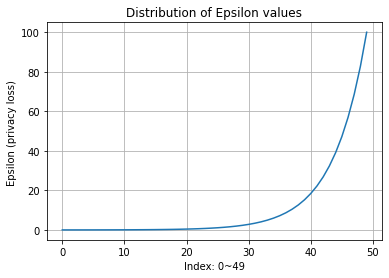

In [0]:
epsilon_idx = list(range(0, len(epsilons)))

fig, ax = plt.subplots()
ax.plot(epsilon_idx, epsilons)
ax.set(xlabel='Index: 0~49', ylabel='Epsilon (privacy loss) ',
       title='Distribution of Epsilon values')
ax.grid()

#fig.savefig("test.png")
plt.show()

**Gaussian Naive Bayes models with anonymized data**

Dataset index: 0 ~ 11  
epsilons = np.logspace(-2, 2, 50)  

Each dataset, Gaussian Naive Bayes models with different parameters of Epsilon are built.

In [0]:
data_index_dict = {}
data_all_index_dict = {}

i = 0
for c in fare: 
  X[c] = diff_df[c]

  for c1 in familysize:
    X[c1] = diff_df[c1]

    for c2 in age:
      X[c2] = diff_df[c2]
      # data index dictionary (variations of Age, Fare, and FamilySize)
      data_index_dict[i] = X.columns.drop(X_basic.columns).values
      data_all_index_dict[i] = X.columns.values
      
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  #split train data 80% and test data 20%

      getGaussianNaiveBayes(X_train, X_test, Y_train, Y_test, i)
      i+=1
      X = X.drop(c2, axis=1)
    
    X = X.drop(c1, axis=1)
  X = X.drop(c, axis=1)

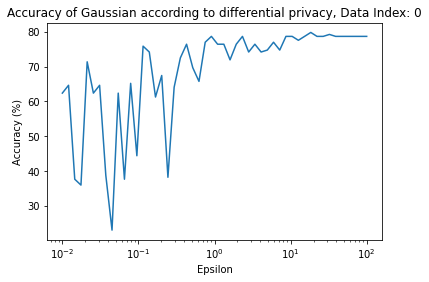

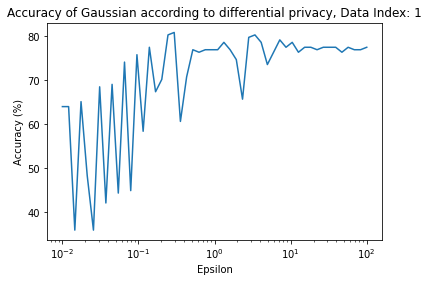

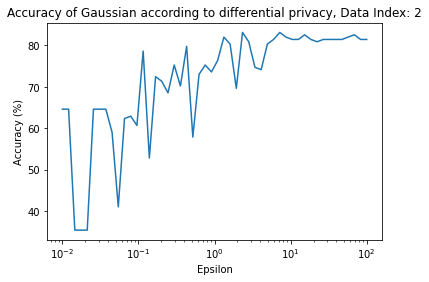

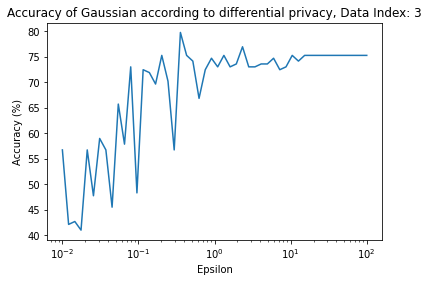

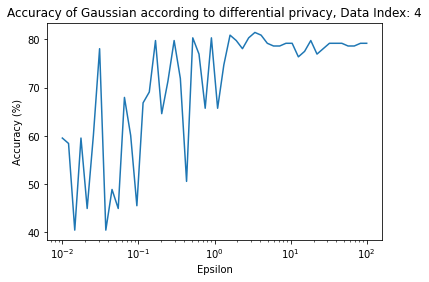

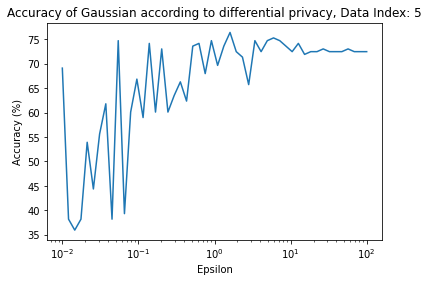

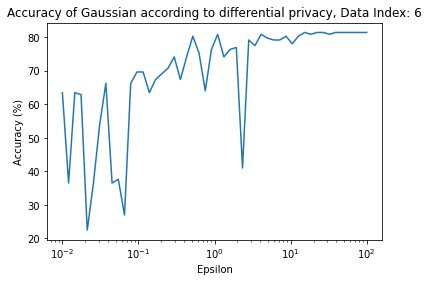

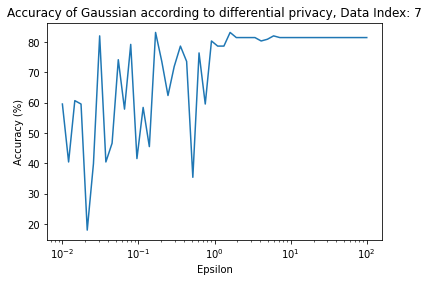

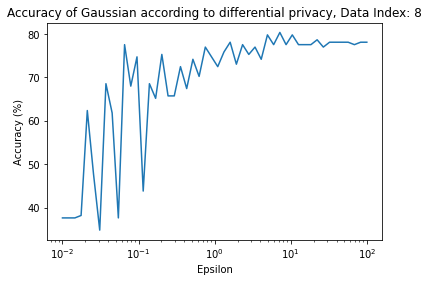

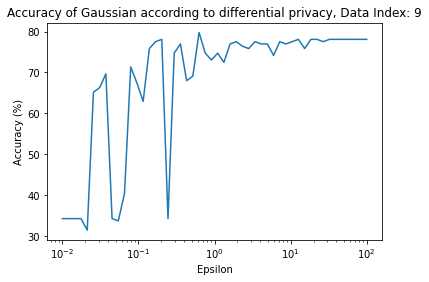

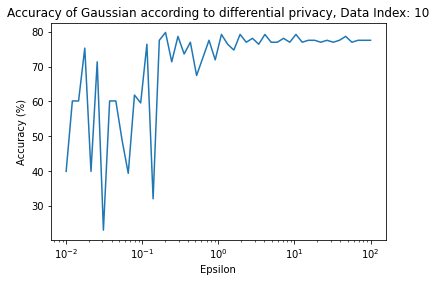

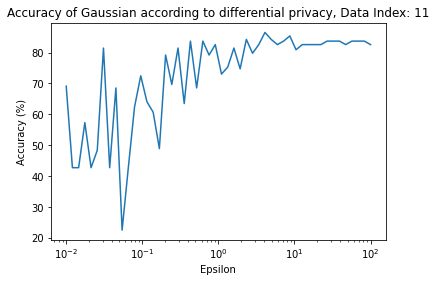

In [0]:
for k,v in acc_gaussian_diffpriv.items():
  plt.semilogx(epsilons, v)
  plt.title("Accuracy of Gaussian according to differential privacy, Data Index: " + str(k))
  plt.xlabel("Epsilon")
  plt.ylabel("Accuracy (%)")
  plt.show()

**Gaussian Naive Bayes models without anonymization**

In [0]:
result_models_df = pd.read_csv('./drive/My Drive/data_anonymization/data/result_models.csv', sep='\t', encoding='utf-8')
result_models_df.drop("Unnamed: 0", axis=1, inplace=True)

In [0]:
result_gaussian = result_models_df.drop(axis=0, index=[12,13])[["acc_gaussian"]]
result_gaussian.rename(columns={"acc_gaussian": "acc(w/o anoanymization)"}, inplace=True)

**Max and Min results of Gaussian Naive Bayes models with anonymized data**

In [0]:
dict_result_gaussian = {}

len_ep = len(epsilons)

result_max_model_acc = []
result_max_eps_idx = []
result_max_eps_val = []
result_min_model_acc = []
result_min_eps_idx = []
result_min_eps_val = []

for k,v in acc_gaussian_diffpriv.items():
  result_max_model_acc.append(max(v))
  result_max_eps_idx.append(v.index(max(v)))
  result_max_eps_val.append(round(epsilons[v.index(max(v))],2))

  result_min_model_acc.append(min(v))
  result_min_eps_idx.append(v.index(min(v)))
  result_min_eps_val.append(round(epsilons[v.index(min(v))],2))

In [0]:
dict_result_gaussian = {
  'max_acc': result_max_model_acc,

  'max_epsilon': result_max_eps_val,
  'max_epsilon_idx': result_max_eps_idx,

  'min_acc': result_min_model_acc,
  'min_epsilon': result_min_eps_val,
  'min_epsilon_idx': result_min_eps_idx
  
}

df_result_gaussian = pd.DataFrame(dict_result_gaussian)

In [0]:
#epsilons = np.logspace(-2, 2, 50)
print("Differential Privacy using Gaussian Naive Bayes")
print("Number of epsilon index: ", len(epsilons))
print("Epsilon range: ", min(epsilons), " ~ ", max(epsilons))
df_result_gaussian

Differential Privacy using Gaussian Naive Bayes
Number of epsilon index:  50
Epsilon range:  0.01  ~  100.0


,max_acc,max_epsilon,max_epsilon_idx,min_acc,min_epsilon,min_epsilon_idx
0,79.78,18.42,40,23.03,0.04,8
1,80.90,0.29,18,35.96,0.01,2
2,83.15,2.33,29,35.39,0.01,2
3,79.78,0.36,19,41.01,0.02,3
4,81.46,3.39,31,40.45,0.01,2
5,76.40,1.60,27,35.96,0.01,2
6,81.46,15.26,39,22.47,0.02,4
7,83.15,0.17,15,17.98,0.02,4
8,80.34,7.20,35,34.83,0.03,6
9,79.78,0.63,22,31.46,0.02,4


In [0]:
result_gaussian['max_acc'] = result_max_model_acc
result_gaussian['min_acc'] = result_min_model_acc
result_gaussian

,acc(w/o anoanymization),max_acc,min_acc
0,79.78,79.78,23.03
1,78.65,80.90,35.96
2,79.78,83.15,35.39
3,80.34,79.78,41.01
4,78.09,81.46,40.45
5,81.46,76.40,35.96
6,74.72,81.46,22.47
7,78.09,83.15,17.98
8,81.46,80.34,34.83
9,73.60,79.78,31.46


### **Control Privacy Level**

We may want the model accuracy in a certain level to keep epsilon value as small as possible (i.e., privacy is preserved).


In [0]:
def getModelsAbovePct(diff_models, pct):
  data_idx = []
  model_acc = []
  eps_idx = []
  eps_val = []

  print("Models above above the accuracy percent:", pct, "%")
  for k,v in diff_models.items(): #for 0~11 dataset: acc_gaussian_diffpriv, list of accuracy for 50 different epsilon models: v
    isSatisfied = False
    for e in v: #for each dataset: v, model accuracy of each model e
      if e >= pct:
        data_idx.append(k)
        model_acc.append(e)
        eps_idx.append(v.index(e))
        eps_val.append(round(epsilons[v.index(e)],2))

        #print(k, round(epsilons[v.index(e)],2))
        isSatisfied = True
        break
    if isSatisfied == False:
      print("data_index", k, ": No model exist above the accuracy percent:", pct, "%")


  dict_model_pct = {
      "data_index": data_idx,
      "model_acc": model_acc,
      "epsilon":  eps_val, 
      "epsilon_idx": eps_idx
  }

  df_model_pct = pd.DataFrame(dict_model_pct)
  return df_model_pct

For example, let's say we want the model accuracy above 80%.

In each dataset, the results retreive the model with smallest epsilon value.
There can be the data that has no model above the specified accuracy.

The epsilon values ranges from 0.24 to 7.20.

The highest accuracy using Gaussian Naive Bayes model is 82.02.
The two models with index 2 and 7 produces the highest result.
**Here, we choose the model with index 7 because its epsilon is smaller** than the model with index 2 (0.03 < 1.33).  
**The epsilon value gets smaller, the more privacy is preserved.**

In [0]:
getModelsAbovePct(acc_gaussian_diffpriv, 80)

Models above above the accuracy percent: 80 %
data_index 0 : No model exist above the accuracy percent: 80 %
data_index 3 : No model exist above the accuracy percent: 80 %
data_index 5 : No model exist above the accuracy percent: 80 %
data_index 9 : No model exist above the accuracy percent: 80 %
data_index 10 : No model exist above the accuracy percent: 80 %


,data_index,model_acc,epsilon,epsilon_idx
0,1,80.34,0.24,17
1,2,82.02,1.33,26
2,4,80.34,0.52,21
3,6,80.34,0.52,21
4,7,82.02,0.03,6
5,8,80.34,7.20,35
6,11,81.46,0.03,6


## Summary

Data anonymization is the process of dealing data, and it should be applied on the purpose of using data. It also requires to understand and have insights on data. From my experience and sense, data anonymization should not be automated but dealt with manually (of couse, with the aid of risk managing measures) to fit each use case of data.

The privacy can be controlled by the privacy purpose of the organization/company/institution.

## Reference

* "Information Privacy Engineering and Privacy by Design", Stallings, William, Pearson Education. Kindle Edition. 
* "Guide to basic data anonymization techniques", Personal Data Protection Commission (PDPC) Singapore, https://www.pdpc.gov.sg/-/media/Files/PDPC/PDF-Files/Other-Guides/Guide-to-Anonymisation_v1-(250118).pdf
* Privacy Protection https://docs.cryptonumerics.com/cn-protect-ds/?page=docs.cryptonumerics.com/cn-protect-ds-html/overview.html
* Take charge of your data: Understanding re-identification risk and quasi-identifiers with Cloud DLP https://cloud.google.com/blog/products/identity-security/taking-charge-of-your-data-understanding-re-identification-risk-and-quasi-identifiers-with-cloud-dlp
* Generalization and bucketing https://cloud.google.com/dlp/docs/concepts-bucketing
* Implementations for k-anonymity and l-diversity.  
https://github.com/SGMAP-AGD/Tools/blob/master/agd_tools/anonymization.py
* Anonymization by imperva 
https://www.imperva.com/learn/data-security/anonymization/
* Explaining Differential Privacy in 3 Levels of Difficulty https://aircloak.com/explaining-differential-privacy/
* Differential privacy by Apple https://www.apple.com/privacy/docs/Differential_Privacy_Overview.pdf